# Introduction to NumPy

Goal: Learn about effectively loading, storing and manipulating in-memory data in Python

# Thinking about datasets

- Wide range of sources
- Wide range of formats
    - Collections of documents
    - Collections of images
    - Collections of sounds clips
    - Collections of numerical measurements
    - etc.

- Seemingly heterogeneous
- Useful to think of all data fundamentally as __arrays of numbers__.

# Example: Digital Images

Simply two-dimensional arrays of numbers representing pixel brightness across the area.


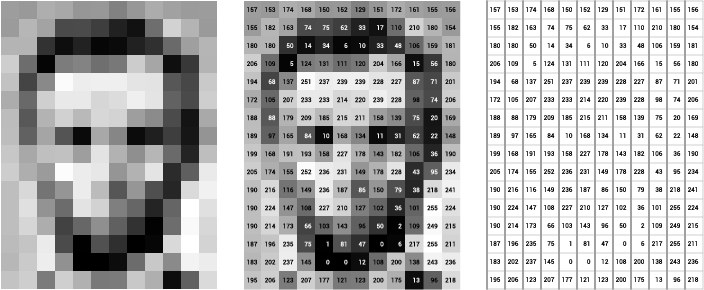
(image from https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png)

In [2]:
from skimage import io

In [3]:
im = io.imread("bert.jpg")
io.imshow(im)
io.show()

FileNotFoundError: No such file: 'c:\Users\kris\OneDrive\Desktop\vs_workspace\UoB\programming_for_ds\bert.jpg'

In [ ]:
im

array([[[140, 133,  42],
        [133, 126,  35],
        [139, 132,  41],
        ...,
        [158, 125,  94],
        [160, 128,  90],
        [155, 124,  78]],

       [[136, 128,  30],
        [137, 128,  33],
        [146, 137,  46],
        ...,
        [156, 122,  95],
        [160, 125,  97],
        [158, 123,  91]],

       [[135, 127,  29],
        [139, 130,  39],
        [146, 136,  51],
        ...,
        [157, 121,  97],
        [162, 125, 106],
        [163, 127, 105]],

       ...,

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [  9,   9,  17],
        [  5,   8,  15],
        [  3,   6,  15]],

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [  9,   9,  19],
        [  5,   7,  19],
        [  3,   5,  17]],

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [  6,   9,  18],
        [  7,   9,  21],
        [  3,   5,  18]]

# Example: Sound Clips

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

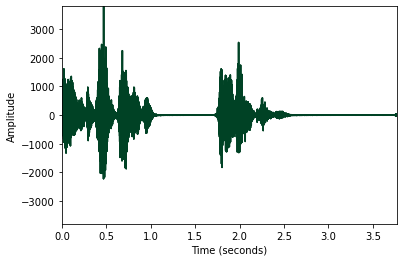

In [ ]:
'''code from: https://medium.com/swlh/visualising-speech-74137f0b793b'''
wavfn= "intro.wav"
fs, x = wavfile.read(wavfn)
y = np.linspace(0,len(x)/float(fs), len(x))
ya = np.max(np.absolute(x))
plt.plot(y, x, color="#004225")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.ylim(-ya, ya)
plt.xlim(0, y[-1])
plt.show()

In [ ]:
x

array([[-20, -20],
       [ 48,  47],
       [ 86,  88],
       ...,
       [-34, -28],
       [-28, -33],
       [-35, -30]], dtype=int16)

In [ ]:
wavfile.read?

In [ ]:
np.linspace?

# What about documents?

In [ ]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 264 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install spacy

     |████████████████████████████████| 6.6 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 460 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 766 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 107 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 14.3 MB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [ ]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

nlp = spacy.load("en_core_web_sm")

animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

animal_tokens = nlp(animals)
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

In [ ]:
animal_vecs_transformed

array([['dog', '0.044682607', '-1.0275031'],
       ['cat', '-0.20693856', '-0.36257124'],
       ['hamster', '-4.4100375', '1.2950461'],
       ['lion', '-1.2435601', '-1.6725844'],
       ['tiger', '-1.314602', '0.39112672'],
       ['elephant', '0.7982808', '-1.2237902'],
       ['cheetah', '1.2478331', '5.2034574'],
       ['monkey', '-0.8115314', '-1.4222784'],
       ['gorilla', '-2.936252', '-0.35175383'],
       ['antelope', '-1.2086861', '-1.820906'],
       ['rabbit', '-1.9174788', '1.8752388'],
       ['mouse', '-1.3047575', '0.233307'],
       ['rat', '-1.1593548', '0.68602306'],
       ['zoo', '-1.7044935', '0.6871987'],
       ['home', '-0.82394993', '0.9066961'],
       ['pet', '1.9577646', '0.19146231'],
       ['fluffy', '2.6970959', '-2.4800224'],
       ['wild', '4.2950573', '-4.3191886'],
       ['domesticated', '8.000928', '3.2110407']], dtype='<U32')

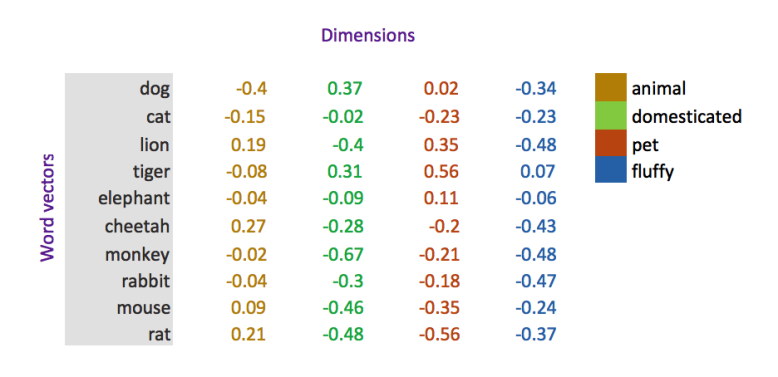

from https://towardsdatascience.com/word-vectors-for-non-nlp-data-and-research-people-8d689c692353

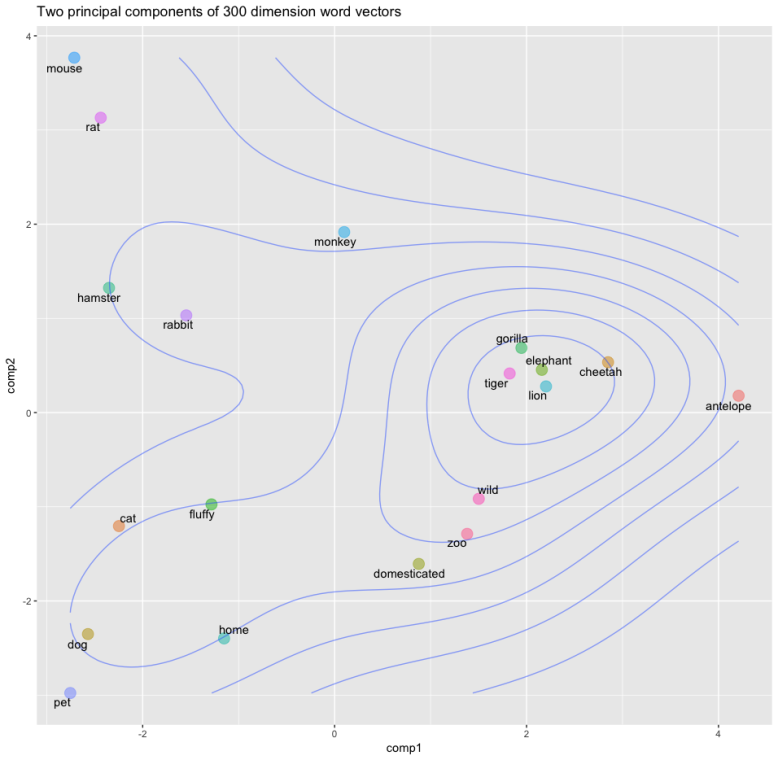
from https://towardsdatascience.com/word-vectors-for-non-nlp-data-and-research-people-8d689c692353 

# Numerical Arrays

- Efficient storage and manipulation is fundamental to the data science process

# NumPy

- Ensure it is installed:

    - `conda install numpy`

- Whenever you want to us the package, ensure the following is imported at the start of your workbooks:

    - `import numpy as np`

# Data Types in Python

- Python is easy to use, primarily because of __dynamic typing__
- Java or C requires variables to be explicitly declared with a type e.g *int*
    - e.g in Java `int x = 10`
- Python skips this step
    - e.g `x = 10`
- What this means is that types are dynamically inferred, so changing what is stored is simple:
    `x = "ten"`
- This wouldn't work in Java or C.

# Why does this work?

- Python is written in C
- Every Python object is a cleverly disguised C-structure
- When declaring an integer, it is not just a raw integer, but a pointer to a structure containing lots of information e.g type, size, digit and reference count.
- Given this, there is some overhead computationally and comes at a cost which is apparent in structures that combine these objects

# Python Lists

- The standard mutable multi-element container in Python is a list.

In [ ]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
type(L[0])

int

In [ ]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
type(L2[0])

str

In [ ]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

- This comes at a cost with the overhead of all the different item types in a list.
- If all variables are of the same type, much of the information held in the structures is redundant.
- Much more efficient to store in a fixed-type array.
- Difference between a fixed type (NumPy style) and dynamic type list is as follows:

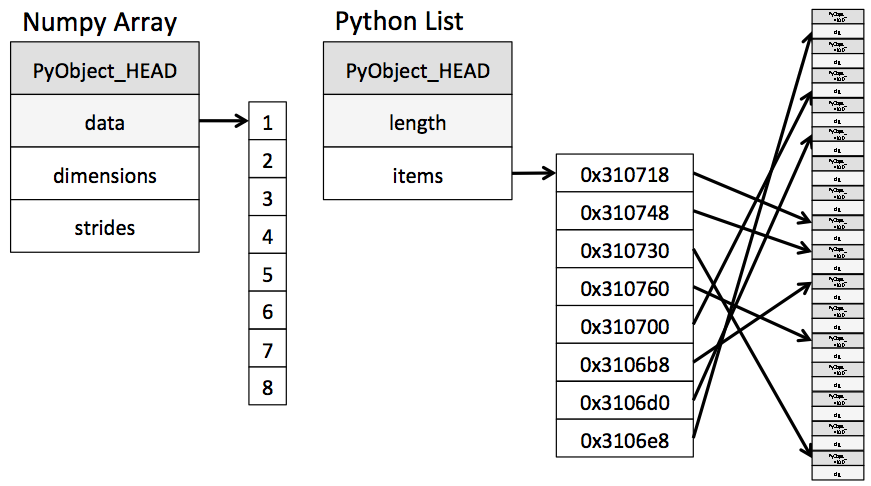

- Single pointer to one contiguous block of data.
- Python list uses a pointer to a block of pointers that point to the full Python object.
- It's a trade off of efficiciency of storage and manipulation vs flexibility

# Fixed-Type Arrays in Python

- Python has different ways for storing data in efficient, fixed-type data buffers.
- The built in `array` module can be used to create dense arrays of uniform type.

In [ ]:
import array as arr
L = list(range(10))
A = arr.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`i` is a type code indicating the contents are integers.

`ndarray` from the NumPy package is a bit more useful as it adds efficient operations on the data.

In [ ]:
arr.array?

# Creating Arrays from Python Lists

`np.array` can be used to create arrays from Python Lists

In [5]:
import numpy as np

In [ ]:
np.array([1, 4, 2, 5, 3, 7, 8])

array([1, 4, 2, 5, 3, 7, 8])

__N.B__ Unlike Python lists, Numpy arrays must contain the same type.

If they don't Numpy will upcast, if possible.

In [ ]:
np.array([3.14, 1, 2, 3])

array([3.14, 1.  , 2.  , 3.  ])

Unlinke Python lists, NumPy arrays can be multi-dimensional.

In [ ]:
np.array([range(i, i + 4) for i in [1,2,3]])

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

# Creating Arrays from Scratch

More efficient to use inbuilt routines from NumPy rather than programmatically e.g `for` loops

In [ ]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.53629612, 0.68726024, 0.21841151],
       [0.90220894, 0.86540799, 0.30190661],
       [0.03995572, 0.55765623, 0.43007556]])

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-2.18518552, -1.35981215,  0.81229477],
       [-0.42881479, -0.13333598,  0.3401164 ],
       [ 0.95238649,  0.79075757,  1.11635144]])

In [ ]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[1, 0, 3],
       [5, 9, 4],
       [3, 6, 7]])

In [ ]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

# The Basics of NumPy Arrays

We're going to look at several examples of how to use NumPy arrays manipulation for the following tasks:

- Access data and subarrays
- Split data
- Reshape data
- Join arrays.

- Warning: this is super dry! As with most dull things in life, it forms the basis for more exciting things later in the module.

# NumPy Array Attributes

Goal: define three random arrays; 1-dimensional, 2-dimensional and 3-dimensional

In [ ]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Arrays have the following attributes:
- `ndim` (number of dimensions)
- `shape`(size of each dimension)
- `size`(total size of the array)
- `dtype` (data type of the array)

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("x3 datatype: ", x3.dtype)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
x3 datatype:  int64


In [ ]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Question: how many dimensions does x2 have?

What is the size of x2?

# Array indexing: Accessing Single Elements

- Quite familiar to the way you access an element of a list

In [ ]:
x1

array([5, 0, 3, 3, 7, 9])

In [ ]:
x1[0]

5

In [ ]:
x1[4]

7

To access from the __end__ of an array, use negative indexing:

In [ ]:
x1[-1]

9

In [ ]:
x1[-2]

7

For multi-dimensional arrays, items can be accessed using a comma-separated tuple of indices:

In [ ]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [ ]:
x2[0, 0]

3

In [ ]:
x2[2, -1]

7

How to access the number 1?

Values can be modified using any of the above index notation:

In [ ]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

# Array Slicing: Accessing Subarrays

- Square brackets can be used to access individual elements at a given index.
- Using the colon (`:`) known as the slice notation, you can access subarrays as follows:

`x[start:stop:step]`

- If any left undefined `start=0`, `stop=size of dimension` and `step=1`

In [ ]:
# for one dimensional arrays
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [ ]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [ ]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [ ]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [ ]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

Step can be negative, which reverses an array

In [ ]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

## Multi-dimensional arrays

In [ ]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [ ]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [ ]:
# reversing subarray dimensions
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

## How to access a single row or column?

In [ ]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [ ]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In [ ]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


## Subarrays as no-copy views

In [ ]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [ ]:
# extract a 2 x 2 subarray from x2
x2_sub = x2[:2, :2]
x2_sub

array([[12,  5],
       [ 7,  6]])

In [ ]:
# lets modify x2_sub
x2_sub[0, 0] = 99
x2_sub

array([[99,  5],
       [ 7,  6]])

In [ ]:
# But, let's see what's happened to x2...
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

This is sort of useful - we can process bits of a large dataset without needing to copy buffer data

## Creating copies of arrays

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)


[[99  5]
 [ 7  6]]


In [ ]:
# if we modify the subarray now, the original is untouched!
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [ ]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Reshaping of Arrays

Use the `reshape`method

In [ ]:
# Put numbers 1 to 9 in a 3 x 3 grid
# N.B Size of original array __must__ match that of the reshaped array
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# Another use case is reshaping an 1D array to 2D row or column matrix
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [ ]:
# a bit easier is to use row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [ ]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [ ]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [ ]:
grid[np.newaxis, :]

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [ ]:
grid.reshape(9,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

## Array Concatenation & Splitting

- Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines
    - `np.concatenate`
    - `np.vstack`
    - `np.hstack` 
     
- `np.concatenate` takes a tuple or list of arrays as its first argument:

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [ ]:
# Concatenate more than two arrays:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [4]:
# Concatentate 2D arrays:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

NameError: name 'np' is not defined

In [ ]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [ ]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

## Working with arrays of mixed dimensions?

- Possibly easier to use a vertical stack (`np.vstack`) than horizontal stacking (`np.hstack`)

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [ ]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

N.B `np.dstack` will stack arrays along the third axis.

## Splitting arrays

- Opposite of concatenation is splitting. Use the following:
    - `np.split`
    - `np.hsplit`
    - `np.vsplit`

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that N split-points, leads to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar:

In [ ]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


# Recap:

- We've covered the basics of arrays:
    - Creation or 1D and 2(+) dimensional arrays
    - Accessing elements and subarrays
    - Reshaping arrays
    - Concatenation
    - Splitting